<a href="https://colab.research.google.com/github/orca-bytes/INFO201/blob/main/INFO201_Carkeek_Salmon_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carkeek Park Salmon Survey Visualization

To start, create a personal copy of this notebook by clicking File -> Save a Copy in Drive! Then, read the text below and follow the instructions to create a visualization! If you missed the first day in class, make sure to check in with a labmate

There are several species of salmon and most are anadromous, which means they are born in rivers and creeks, go out to sea to live, and return to breed (often in the same river or creek of their birth). Most salmon spend up to a couple years at sea before returning in Autumn in a seasonal migration and spawning event called a salmon run. Around Seattle, there are many fewer locations that support the reproductive cycle of salmon than existed in recent centuries. However, Northwest Seattle's Carkeek Park has been maintained by the Carkeek Watershed Community Action Project ([CWCAP](https://www.carkeekwatershed.org/mission/)) as an educational site with creeks that support (partly) a live salmon run. After decades of work to restore the wetlands around the park, salmon now return in Autumn to spawn. As it turns out, the conditions at the park do not allow many of the eggs laid by the salmon to survive long enough to become fry (the name for baby salmon). However, the population is supported by the additional release of fry that are born and temporarily raised at the Grover's Creek Salmon Hatchery, which is ran by the Suquamish Tribe in Poulsbo.

In Autumn, you can visit the creeks in the park and see salmon swim upstream to spawn as well as the carcasses of salmon -- which die after spawning. You can check out [this video by the Seattle Channel](https://www.youtube.com/watch?v=S5JAcvXAr44) to get a sense of what this looks like.

Every year for several decades, volunteers with CWCAP conduct a survey to try to count all the living and dead salmon that come in the salmon run, as well as the redds (nests) that salmon build there. In 2024, a record number of salmon were observed at more than 3000, where the previous record in recent decades was less than 1000. The volunteers collect other information about the salmon and carcasses tht they observe and make it available publicly. While the 2024 record year data is not yet released, we can check out the 2023 data! Let's check out that data to answer a question:

**How many male and female chum salmon that were found dead in Carkeek Park were determined to have successfully spawned before perishing in 2023?**

## Objectives

*  Create a data visualization that lets you answer this question

## Setup Extra Tools

Run the code below. It sets up some extra tools and specifications in R. No need to change anything!

In [ ]:
library(tidyverse) # This gets some extra graphing tools
options(scipen = 100) # This basically sets how many decimal points you can see in numbers
options(ggplot2.continuous.colour="viridis") # This chooses some color settings
options(ggplot2.continuous.fill = "viridis") # This chooses some color settings
options(warn=-1) # This stops some warning messages popping up

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Run the code below to load the 2023 salmon data (it's stored online) and save it with the name carkeek_2023.

In [ ]:
id <- "1RUXwZNK-J980_OaYABWHpZ-jFpAfiFKB"
carkeek_2023 <- read_csv2(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 840 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (18): Stream, Type, Species, ReddStatus, CarcassLocation, Predation, Ad...
dbl   (4): Distance, Quantity, id, index
num   (5): Length_in, Width_in, Location_latitude, Location_longitude, Locat...
lgl   (4): validation_status, notes, submitted_by, tags
dttm  (3): start, end, submission_time
date  (1): SurveyDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We can check out the variables for this survey data:

In [ ]:
glimpse(carkeek_2023)

Rows: 840
Columns: 35
$ start              <dttm> 2023-10-21 16:43:52, 2023-10-21 16:55:56, 2023-10-…
$ end                <dttm> 2023-10-21 16:46:02, 2023-10-21 16:56:19, 2023-10-…
$ SurveyDate         <date> 2023-10-21, 2023-10-21, 2023-10-21, 2023-10-21, 20…
$ Distance           <dbl> 0, 0, 50, 115, 140, 200, 0, 0, 0, 0, 225, 275, 15, …
$ Stream             <chr> "Piper's Creek", "Piper's Creek", "Piper's Creek", …
$ Type               <chr> "Live", "Live", "Dead", "Live", "Dead", "Dead", "De…
$ Quantity           <dbl> 1, 1, NA, 1, NA, NA, NA, NA, NA, 1, 1, 1, 1, 1, NA,…
$ Species            <chr> "Coho", "Coho", "Coho", "Coho", "Coho", "Coho", "Co…
$ ReddStatus         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ CarcassLocation    <chr> NA, NA, "In creek", NA, "In creek", "In creek", "On…
$ Predation          <chr> NA, NA, "Unknown", NA, "Predation", "Predation", "P…
$ AdiposeFin         <chr> NA, NA, "Unknown", NA, "Yes", "No", "Unknown", "Unk…
$ Length_in       

A lot of these variable names are probably sensible. Some others are weird looking. Some weird variables are used for technical reasons. For instance, uuid stands for Universally Unique Identifier, and is a code to identify this specific data record. Other variables may not make sense if you don't know about the salmon lifecycle or salmon fisheries management.

*   A redd is a "nest" that salmon make on the bed of a river or creek to deposit eggs in
*   The adipose fin is a small fin found on salmon (and other salmonid species). This fin is sometimes found removed from salmon. This is done purposely by human fisheries workers. The fin is removed from fish that are raised by humans in hatcheries before being released as part of programs to manage and sustain salmon population levels. The removal does not seem to impair the salmons movement to a great degree and is used to identify whether a salmon was raised in a hatchery or spawned "naturally".



## Example Visualization

The code below will create a visualization to look at observations of dead salmon. You don't need to change this code but run it to have a look at what is shown. Then, inspect each line of code and try to figure out what it is doing. You can delete or modify lines one by one and try to rerun the code to figure out what's going on in each. What do you think filter(Type == "Dead") does? Try swapping out "Dead" for something else. You can always undo your deletions with CTRL+Z (you need to click the code box first). Once you feel like you have an idea of what's going on, you can progress to make your own graph in the next section!

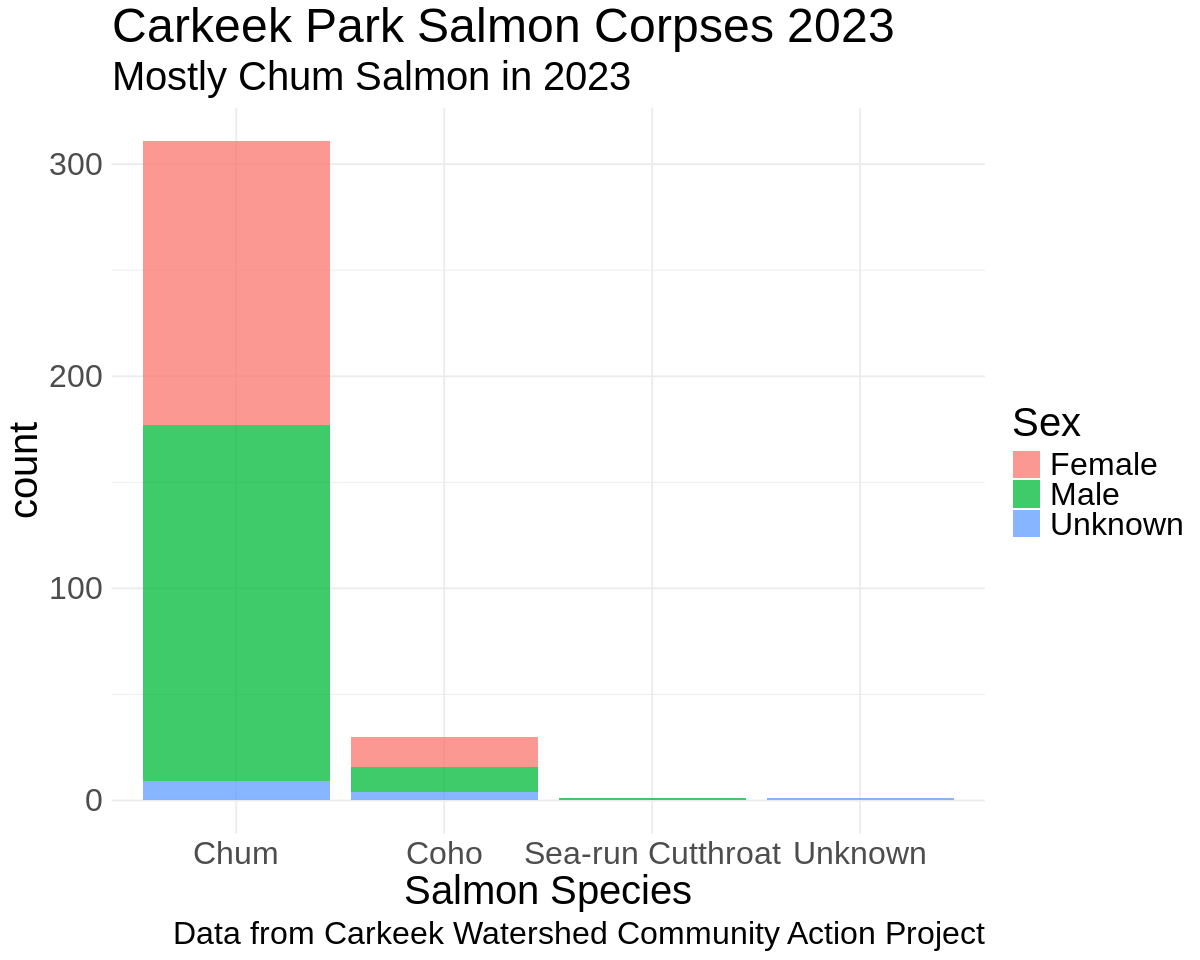

In [ ]:
options(repr.plot.width=10, repr.plot.height=8) # This sets up the size of graphs

carkeek_2023 |>
  filter(Type == "Dead") |>
  ggplot(aes(x = Species, fill = Sex)) +
  geom_bar(alpha = 0.75) +
  theme_minimal() +
  theme(text = element_text(size = 24)) +
  labs(title = "Carkeek Park Salmon Corpses 2023",
       subtitle = "Mostly Chum Salmon in 2023",
        caption = "Data from Carkeek Watershed Community Action Project",
        x = "Salmon Species")

## Create Your Graph!

We want to answer: **How many male and female chum salmon that were found dead in Carkeek Park were determined to have successfully spawned before perishing in 2023?**

Create a new visualization that lets you see how many male and female **chum** salmon carcasses were found in Carkeek park in 2023 *and* the proportion of those chum salmon that surveyors were able to determine had spawned (mated) or not.

Some notes:

*   You can copy and adapt code from above
*   You will need to add a *new line* to the code. This new line of code will make sure that you are only looking at **chum** salmon and not other species of salmon. In other words, we want to filter through our data to make sure that we only look at chum salmon.
*   You will need to swap out variable names
*   You should change the title and labels of this graph.



## Upload your graph!

Once you're done, take a screenshot of your graph or save it by right-clicking and selecting save-as. In Lab Check-In one, submit your graph!